In [ ]:

import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Task 1: Acquire, preprocess, and analyze the data

##### hepatitis data 

In [ ]:
hepatitis_path= 'hepatitis.data'
messidor_path='messidor_features.arff'
hepatitis_data = np.genfromtxt(hepatitis_path, delimiter=',')

names=['DieLive','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA',\
    'LIVER BIG','LIVER FIRM','SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES',\
        'BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']
hepatitis_data= pd.DataFrame(hepatitis_data, columns=names)  # original data with names
hepatitis_data['DieLive'] = hepatitis_data['DieLive'].apply(lambda x: 0 if x == 1 else 1)


In [ ]:
#original hepatitis data
hepatitis_data.head()

,DieLive,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,1,30.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1.0
1,1,50.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1.0
2,1,78.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1.0
3,1,31.0,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1.0
4,1,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1.0


It shows number of NaNs for each attribute.

In [ ]:
num_of_Na_Colums= hepatitis_data.isna().sum()
num_of_Na_Colums.to_frame().T  # most attributes have less than 6 NaNs  

,DieLive,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,0,0,1,0,1,1,1,10,11,5,5,5,5,6,29,4,16,67,0


In [ ]:
new_indices1 = num_of_Na_Colums[num_of_Na_Colums.values<6].index # get attributes which have less than 6 unknown datasets
dropped_hepatitis_data1 =hepatitis_data[new_indices1]           #drop columns that have more than 6 unknown data
dropped_hepatitis_data1 = dropped_hepatitis_data1.dropna(thresh=14)       #drop every dataset with unknown data; 14 = 20 original attributes - 6 attributes with NaNs 

new_indices2 = num_of_Na_Colums[num_of_Na_Colums.values<12].index # get attributes which have less than 12 unknown datasets
dropped_hepatitis_data2 =hepatitis_data[new_indices2]           #drop columns that have more than 12 unknown data
dropped_hepatitis_data2 = dropped_hepatitis_data2.dropna(thresh=17)       #drop every dataset with unknown data; 17 = 20 original attributes - 3 attributes with NaNs 


##### messidor features data

In [ ]:
messidor_features_data = loadarff(messidor_path)
names=['QA','pre-screening','MA_a0.5','MA_a0.6','MA_a0.7','MA_a0.8','MA_a0.9',\
    'MA_a1','MA_lesions1','MA_lesions2','MA_lesions3','MA_lesions4','MA_lesions5',\
    'MA_lesions6','MA_lesions7','MA_lesions8','euclidean','diameter','AM/FM','DR']
messidor_features_data = pd.DataFrame(messidor_features_data[0])
messidor_features_data.set_axis(names, axis='columns', inplace=True)
messidor_features_data['DR'] = messidor_features_data['DR'].apply(lambda x: 0 if x == b'0' else 1) # convert string values to int values
messidor_features_data.head() #original messidor features data

,QA,pre-screening,MA_a0.5,MA_a0.6,MA_a0.7,MA_a0.8,MA_a0.9,MA_a1,MA_lesions1,MA_lesions2,MA_lesions3,MA_lesions4,MA_lesions5,MA_lesions6,MA_lesions7,MA_lesions8,euclidean,diameter,AM/FM,DR
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1


###### Both column 2-7 and 8-15 contain the same info however they are represented by different methods. Thus, I think we don't need both info to train the model. we can try to train our model with original datasets, datasets without MA dection at the alphas, and datasets without MA_lesions and see which datasets train the most accurate model.

In [ ]:
dropped_MAa_data= messidor_features_data.drop(['MA_a0.5','MA_a0.6','MA_a0.7','MA_a0.8','MA_a0.9','MA_a1'],axis=1)
dropped_MAa_data.head()

,QA,pre-screening,MA_lesions1,MA_lesions2,MA_lesions3,MA_lesions4,MA_lesions5,MA_lesions6,MA_lesions7,MA_lesions8,euclidean,diameter,AM/FM,DR
0,1.0,1.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0
1,1.0,1.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0
2,1.0,1.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1
3,1.0,1.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0
4,1.0,1.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1


In [ ]:
dropped_lesions_data= messidor_features_data.drop(['MA_lesions1','MA_lesions2','MA_lesions3','MA_lesions4',\
    'MA_lesions5','MA_lesions6','MA_lesions7','MA_lesions8'],axis=1)
dropped_lesions_data.head()

,QA,pre-screening,MA_a0.5,MA_a0.6,MA_a0.7,MA_a0.8,MA_a0.9,MA_a1,euclidean,diameter,AM/FM,DR
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,0.486903,0.100025,1.0,0
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,0.520908,0.144414,0.0,0
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,0.530904,0.128548,0.0,1
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,0.483284,0.114790,0.0,0
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,0.475935,0.123572,0.0,1


##### Scaling data


###### Some of the Messidor Features data has scaling issues. We can normalize all the features into a smaller range to get better results with a KNN algorithm.

In [ ]:
messidor_features_scaled_data = (messidor_features_data-messidor_features_data.mean())/messidor_features_data.std()
dropped_lesions_scaled_data =  (dropped_lesions_data-dropped_lesions_data.mean())/dropped_lesions_data.std()
dropped_MAa_data_scaled_data = (dropped_MAa_data-dropped_MAa_data.mean())/dropped_MAa_data.std()

messidor_features_scaled_data['DR'] = messidor_features_data['DR']
dropped_lesions_scaled_data['DR'] = dropped_lesions_data['DR']
dropped_MAa_data_scaled_data['DR'] = dropped_MAa_data['DR']


### Task 2: Implementing KNN and DT

##### KNN Class

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:
    #using manhattan method because it is better than euclidean to calculate distance in high dimentional spaces.
    def __init__(self, K=1, dist_fn= manhattan):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = int(np.max(y) + 1) 
        return self

    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        y_pred = np.argmax(y_prob, axis=-1)
        return y_pred
        
    def predict_proba(self, x_test):
        ''' Returns accuracy score '''
        num_test = x_test.shape[0]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #simply divide by K to get a probability distribution
        y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #y_prob /= self.K

        return y_prob
        
    def evaluate_acc(self, y_ture, y_pred):
        ''' Returns accuracy score '''
        accuracy = np.sum(y_pred == y_ture)/y_ture.shape[0]

        return accuracy

##### DT Class


In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built


    


In [ ]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        #to recursively build the rest of the tree
        self._fit_tree(self.root)
        return self                          
    def _fit_tree(self, node):
        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value
        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)
        #assign the left and right child to present child
        node.left = left
        node.right = right

    def predict(self, data_test):

      class_probs = np.zeros((data_test.shape[0], self.num_classes))
      for n, x in enumerate(data_test):
          node = self.root
          #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
          while node.left:
              if x[node.split_feature] <= node.split_value:
                  node = node.left
              else:
                  node = node.right
          #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
          class_probs[n,:] = node.class_prob

      y_pred = np.argmax(class_probs, axis=-1)

      return y_pred

    def predict_proba(self, data_test):
      class_probs = np.zeros((data_test.shape[0], self.num_classes))
      for n, x in enumerate(data_test):
          node = self.root
          #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
          while node.left:
              if x[node.split_feature] <= node.split_value:
                  node = node.left
              else:
                  node = node.right
          #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
          class_probs[n,:] = node.class_prob
      return class_probs
    def evaluate_acc(self, y_ture, y_pred):
      ''' Returns accuracy score '''
      accuracy = np.sum(y_pred == y_ture)/y_ture.shape[0]

      return accuracy
#DecisionTree.fit = fit
#DecisionTree._fit_tree = _fit_tree
#DecisionTree.predict = predict

### Task 3: Running experiments

#### Validation functions

In [ ]:
def cross_validate(model, X_input, Y_output):
    kf = KFold(n_splits=5, random_state=1, shuffle=True)
    y = np.array([0] * X_input.shape[0])
    yh = np.array([0.0] * X_input.shape[0])
    for train_index, test_index in kf.split(X_input):
        model.fit(X_input[train_index], Y_output[train_index])
        y[test_index] = Y_output[test_index]
        yh[test_index] = model.predict_proba(X_input[test_index])[:,1]
    return y, yh

#### Best K values and its accuracy for KNN. Then best depth value for DT.

In [ ]:
# initialize input and output data  
X_h1=dropped_hepatitis_data1.drop(['DieLive'],axis=1).to_numpy() #input
Y_h1=dropped_hepatitis_data1['DieLive'].to_numpy(dtype=int) #output
X_h2=dropped_hepatitis_data2.drop(['DieLive'],axis=1).to_numpy() #input
Y_h2=dropped_hepatitis_data2['DieLive'].to_numpy(dtype=int) #output

X_m1 = messidor_features_data.drop(['DR'], axis=1).to_numpy() #input
Y_m1 = messidor_features_data['DR'].to_numpy(dtype=int) #output
X_m2 = dropped_lesions_data.drop(['DR'], axis=1).to_numpy()
Y_m2 = dropped_lesions_data['DR'].to_numpy(dtype=int)
X_m3 = dropped_MAa_data.drop(['DR'], axis=1).to_numpy()
Y_m3 = dropped_MAa_data['DR'].to_numpy(dtype=int)

X_m1_scaled = messidor_features_scaled_data.drop(['DR'], axis=1).to_numpy()
Y_m1_scaled = messidor_features_scaled_data['DR'].to_numpy(dtype=int)
X_m2_scaled = dropped_lesions_scaled_data.drop(['DR'], axis=1).to_numpy()
Y_m2_scaled = dropped_lesions_scaled_data['DR'].to_numpy(dtype=int)
X_m3_scaled = dropped_MAa_data_scaled_data.drop(['DR'], axis=1).to_numpy()
Y_m3_scaled = dropped_MAa_data_scaled_data['DR'].to_numpy(dtype=int)



input_hepatitis =[X_h1,X_h2] 
output_hepatitis = [Y_h1,Y_h2]


input_messidor=[X_m1,X_m2,X_m3,X_m1_scaled,X_m2_scaled,X_m3_scaled]
output_messidor=[Y_m1,Y_m2,Y_m3,Y_m1_scaled,Y_m2_scaled,Y_m3_scaled]

Running DT with Cost Missclassification Hepatitis

Text(0.7, 0.5, 'test_accuracy = 0.83')

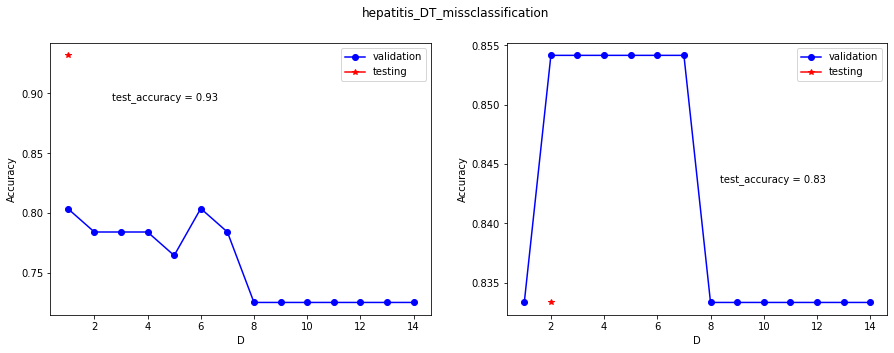

In [ ]:

model_choices_List =[]
valid_acc_List =[]
bestDs =[]
test_accuracy_List =[]

for i in range(len(input_hepatitis)):   # validate each hepatitis dataset 
    X_train, X_test, y_train, y_test = \
    train_test_split(input_hepatitis[i], output_hepatitis[i], test_size=0.3, random_state=11)
    X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.5, random_state=11)

    model_choices=[]
    valid_acc = []
    n_valid = y_valid.shape[0]

    
    N = 15 
    for d in range(1,N): # find the best D 
      tree = DecisionTree(max_depth=d,cost_fn=cost_misclassification)
      y_valid_pred = tree.fit(X_train, y_train).predict(X_valid)
      accuracy = tree.evaluate_acc(y_valid,y_valid_pred)
      model_choices.append(d)
      valid_acc.append(accuracy)


    best_valid_D = model_choices[valid_acc.index(max(valid_acc))]
    model_choices_List.append(model_choices)
    bestDs.append(best_valid_D)
    valid_acc_List.append(valid_acc)

    tree = DecisionTree(max_depth=best_valid_D,cost_fn=cost_misclassification)
    y_test_pred = tree.fit(X_train, y_train).predict(X_test)
    test_accuracy = tree.evaluate_acc(y_test,y_test_pred)
    test_accuracy_List.append(test_accuracy)

#plot validation and testing accuracy using cost missclassification
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('hepatitis_DT_missclassification')
fig.set_figwidth(15), fig.set_figheight(5)
ax1.plot(model_choices_List[0], valid_acc_List[0], marker='o', color='blue', label='validation')
ax1.plot(bestDs[0], test_accuracy_List[0], marker='*', color='red', label='testing')
ax1.set_xlabel('D'), ax1.set_ylabel('Accuracy'), ax1.legend(loc='best')
ax2.plot(model_choices_List[1], valid_acc_List[1], marker='o', color='blue', label='validation')
ax2.plot(bestDs[1], test_accuracy_List[1], marker='*', color='red', label='testing')
ax2.set_xlabel('D'), ax2.set_ylabel('Accuracy'), ax2.legend(loc='best')

ax1.text(0.3, 0.8, "test_accuracy = %0.2f"% test_accuracy_List[0], horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.7, 0.5, "test_accuracy = %0.2f"% test_accuracy_List[1], horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)


Running DT with Cost Missclassification Messidor

In [ ]:
model_choices_List =[]
valid_acc_List =[]
bestDs =[]
test_accuracy_List =[]

for i in range(3):   # validate each messidor dataset 
    X_train, X_test, y_train, y_test = \
    train_test_split(input_messidor[i], output_messidor[i], test_size=0.3, random_state=11)
    X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.5, random_state=11)

    model_choices=[]
    valid_acc = []
    n_valid = y_valid.shape[0]

    
    N = 15 
    for d in range(1,N): # find the best D 
      tree = DecisionTree(max_depth=d,cost_fn=cost_misclassification)
      y_valid_pred = tree.fit(X_train, y_train).predict(X_valid)
      accuracy = tree.evaluate_acc(y_valid,y_valid_pred)
      model_choices.append(d)
      valid_acc.append(accuracy)


    best_valid_D = model_choices[valid_acc.index(max(valid_acc))]
    model_choices_List.append(model_choices)
    bestDs.append(best_valid_D)
    valid_acc_List.append(valid_acc)

    tree = DecisionTree(max_depth=best_valid_D,cost_fn=cost_misclassification)
    y_test_pred = tree.fit(X_train, y_train).predict(X_test)
    test_accuracy = tree.evaluate_acc(y_test,y_test_pred)
    test_accuracy_List.append(test_accuracy)


Text(0.7, 0.3, 'test_accuracy = 0.58')

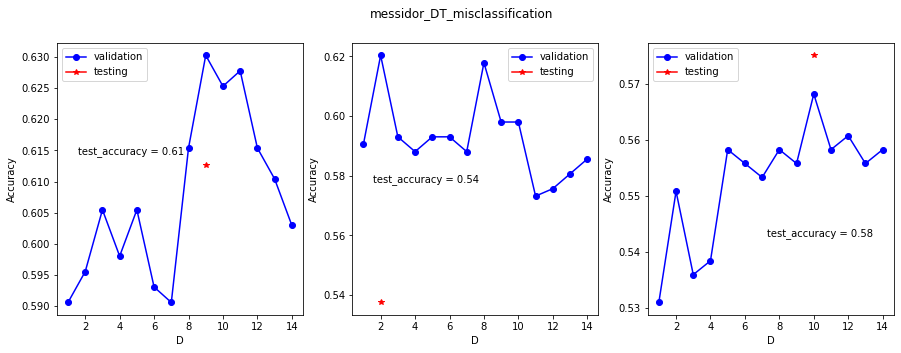

In [ ]:
#plot validation and testing accuracy using cost missclassification
fig, axes = plt.subplots(1, 3)
fig.suptitle('messidor_DT_misclassification')
fig.set_figwidth(15), fig.set_figheight(5)

axes[0].plot(model_choices_List[0], valid_acc_List[0], marker='o', color='blue', label='validation')
axes[0].plot(bestDs[0], test_accuracy_List[0], marker='*', color='red', label='testing')
axes[0].set_xlabel('D'), axes[0].set_ylabel('Accuracy'), axes[0].legend(loc='best')

axes[1].plot(model_choices_List[1], valid_acc_List[1], marker='o', color='blue', label='validation')
axes[1].plot(bestDs[1], test_accuracy_List[1], marker='*', color='red', label='testing')
axes[1].set_xlabel('D'), axes[1].set_ylabel('Accuracy'), axes[1].legend(loc='best')

axes[2].plot(model_choices_List[2], valid_acc_List[2], marker='o', color='blue', label='validation')
axes[2].plot(bestDs[2], test_accuracy_List[2], marker='*', color='red', label='testing')
axes[2].set_xlabel('D'), axes[2].set_ylabel('Accuracy'), axes[2].legend(loc='best')

axes[0].text(0.3, 0.6, "test_accuracy = %0.2f"% test_accuracy_List[0], horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)
axes[1].text(0.3, 0.5, "test_accuracy = %0.2f"% test_accuracy_List[1], horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
axes[2].text(0.7, 0.3, "test_accuracy = %0.2f"% test_accuracy_List[2], horizontalalignment='center', verticalalignment='center', transform=axes[2].transAxes)


Running DT with Entropy as cost function. Hepatitis

Text(0.6, 0.5, 'test_accuracy = 0.83')

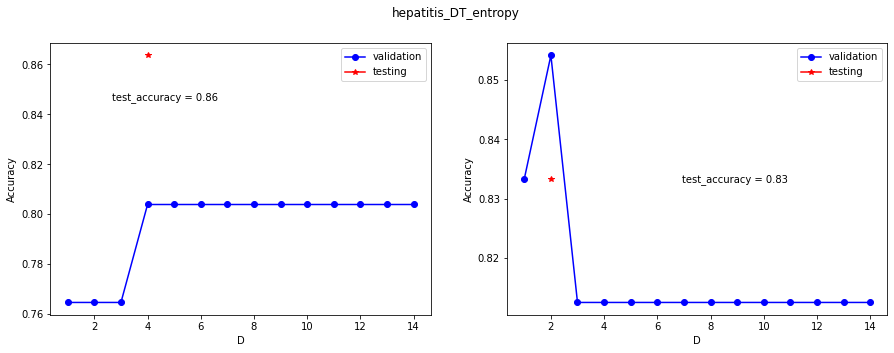

In [ ]:
model_choices_List =[]
valid_acc_List =[]
bestDs =[]
test_accuracy_List =[]

for i in range(len(input_hepatitis)):   # validate each hepatitis datasets 
    X_train, X_test, y_train, y_test = \
    train_test_split(input_hepatitis[i], output_hepatitis[i], test_size=0.3, random_state=11)
    X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.5, random_state=11)

    model_choices=[]
    valid_acc = []
    n_valid = y_valid.shape[0]

    
    N = 15 
    for d in range(1,N): # find the best D 
      tree = DecisionTree(max_depth=d,cost_fn=cost_entropy)
      y_valid_pred = tree.fit(X_train, y_train).predict(X_valid)
      accuracy = tree.evaluate_acc(y_valid,y_valid_pred)
      model_choices.append(d)
      valid_acc.append(accuracy)


    best_valid_D = model_choices[valid_acc.index(max(valid_acc))]
    model_choices_List.append(model_choices)
    bestDs.append(best_valid_D)
    valid_acc_List.append(valid_acc)

    tree = DecisionTree(max_depth=best_valid_D,cost_fn=cost_entropy)
    y_test_pred = tree.fit(X_train, y_train).predict(X_test)
    test_accuracy = tree.evaluate_acc(y_test,y_test_pred)
    test_accuracy_List.append(test_accuracy)


#plot validation and testing accuracy using entropy cost function
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('hepatitis_DT_entropy')
fig.set_figwidth(15), fig.set_figheight(5)
ax1.plot(model_choices_List[0], valid_acc_List[0], marker='o', color='blue', label='validation')
ax1.plot(bestDs[0], test_accuracy_List[0], marker='*', color='red', label='testing')
ax1.set_xlabel('D'), ax1.set_ylabel('Accuracy'), ax1.legend(loc='best')
ax2.plot(model_choices_List[1], valid_acc_List[1], marker='o', color='blue', label='validation')
ax2.plot(bestDs[1], test_accuracy_List[1], marker='*', color='red', label='testing')
ax2.set_xlabel('D'), ax2.set_ylabel('Accuracy'), ax2.legend(loc='best')

ax1.text(0.3, 0.8, "test_accuracy = %0.2f"% test_accuracy_List[0], horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.6, 0.5, "test_accuracy = %0.2f"% test_accuracy_List[1], horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

Running DT with Entropy as cost function. Messidor

In [ ]:
model_choices_List =[]
valid_acc_List =[]
bestDs =[]
test_accuracy_List =[]

for i in range(3):   # validate each hepatitis datasets 
    X_train, X_test, y_train, y_test = \
    train_test_split(input_messidor[i], output_messidor[i], test_size=0.3, random_state=11)
    X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.5, random_state=11)

    model_choices=[]
    valid_acc = []
    n_valid = y_valid.shape[0]

    
    N = 15 
    for d in range(1,N): # find the best D 
      tree = DecisionTree(max_depth=d,cost_fn=cost_entropy)
      y_valid_pred = tree.fit(X_train, y_train).predict(X_valid)
      accuracy = tree.evaluate_acc(y_valid,y_valid_pred)
      model_choices.append(d)
      valid_acc.append(accuracy)


    best_valid_D = model_choices[valid_acc.index(max(valid_acc))]
    model_choices_List.append(model_choices)
    bestDs.append(best_valid_D)
    valid_acc_List.append(valid_acc)

    tree = DecisionTree(max_depth=best_valid_D,cost_fn=cost_entropy)
    y_test_pred = tree.fit(X_train, y_train).predict(X_test)
    test_accuracy = tree.evaluate_acc(y_test,y_test_pred)
    test_accuracy_List.append(test_accuracy)


(Text(0.5, 0, 'D'),
 Text(0, 0.5, 'Accuracy'),
 <matplotlib.legend.Legend at 0x7fbc4689a7d0>)

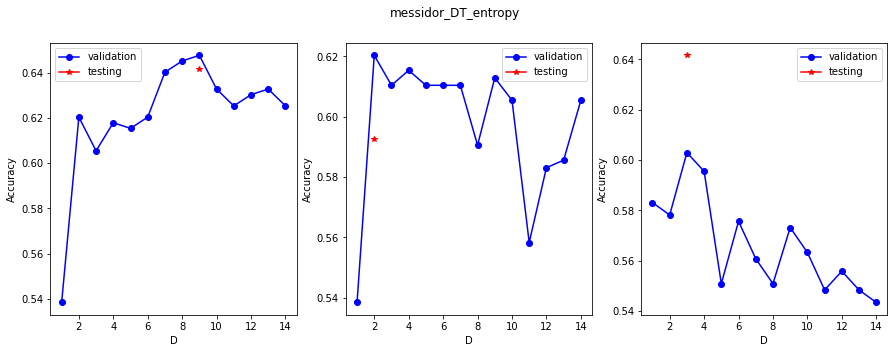

In [ ]:
#plot validation and testing accuracy using entropy cost function

fig, axes = plt.subplots(1, 3)
fig.suptitle('messidor_DT_entropy')
fig.set_figwidth(15), fig.set_figheight(5)
axes[0].plot(model_choices_List[0], valid_acc_List[0], marker='o', color='blue', label='validation')
axes[0].plot(bestDs[0], test_accuracy_List[0], marker='*', color='red', label='testing')
axes[0].set_xlabel('D'), axes[0].set_ylabel('Accuracy'), axes[0].legend(loc='best')
axes[1].plot(model_choices_List[1], valid_acc_List[1], marker='o', color='blue', label='validation')
axes[1].plot(bestDs[1], test_accuracy_List[1], marker='*', color='red', label='testing')
axes[1].set_xlabel('D'), axes[1].set_ylabel('Accuracy'), axes[1].legend(loc='best')
axes[2].plot(model_choices_List[2], valid_acc_List[2], marker='o', color='blue', label='validation')
axes[2].plot(bestDs[2], test_accuracy_List[2], marker='*', color='red', label='testing')
axes[2].set_xlabel('D'), axes[2].set_ylabel('Accuracy'), axes[2].legend(loc='best')

Running DT with Gini index as cost function hepatitis

Text(0.6, 0.5, 'test_accuracy = 0.83')

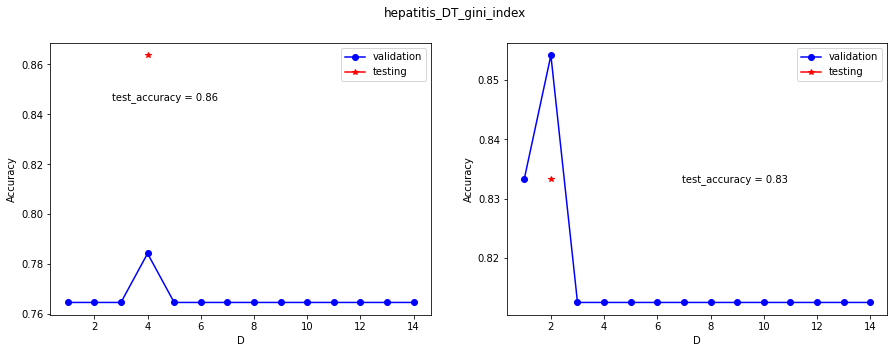

In [ ]:
model_choices_List =[]
valid_acc_List =[]
bestDs =[]
test_accuracy_List =[]

for i in range(len(input_hepatitis)):   # validate each hepatitis datasets 
    X_train, X_test, y_train, y_test = \
    train_test_split(input_hepatitis[i], output_hepatitis[i], test_size=0.3, random_state=11)
    X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.5, random_state=11)

    model_choices=[]
    valid_acc = []
    n_valid = y_valid.shape[0]

    
    N = 15 
    for d in range(1,N): # find the best D 
      tree = DecisionTree(max_depth=d,cost_fn=cost_gini_index)
      y_valid_pred = tree.fit(X_train, y_train).predict(X_valid)
      accuracy = tree.evaluate_acc(y_valid,y_valid_pred)
      model_choices.append(d)
      valid_acc.append(accuracy)


    best_valid_D = model_choices[valid_acc.index(max(valid_acc))]
    model_choices_List.append(model_choices)
    bestDs.append(best_valid_D)
    valid_acc_List.append(valid_acc)

    tree = DecisionTree(max_depth=best_valid_D,cost_fn=cost_gini_index)
    y_test_pred = tree.fit(X_train, y_train).predict(X_test)
    test_accuracy = tree.evaluate_acc(y_test,y_test_pred)
    test_accuracy_List.append(test_accuracy)


#plot validation and testing accuracy using gini index as cost function
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('hepatitis_DT_gini_index')
fig.set_figwidth(15), fig.set_figheight(5)
ax1.plot(model_choices_List[0], valid_acc_List[0], marker='o', color='blue', label='validation')
ax1.plot(bestDs[0], test_accuracy_List[0], marker='*', color='red', label='testing')
ax1.set_xlabel('D'), ax1.set_ylabel('Accuracy'), ax1.legend(loc='best')
ax2.plot(model_choices_List[1], valid_acc_List[1], marker='o', color='blue', label='validation')
ax2.plot(bestDs[1], test_accuracy_List[1], marker='*', color='red', label='testing')
ax2.set_xlabel('D'), ax2.set_ylabel('Accuracy'), ax2.legend(loc='best')

ax1.text(0.3, 0.8, "test_accuracy = %0.2f"% test_accuracy_List[0], horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.6, 0.5, "test_accuracy = %0.2f"% test_accuracy_List[1], horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

Running DT with Gini index as cost function messidor

Text(0.7, 0.4, 'test_accuracy = 0.62')

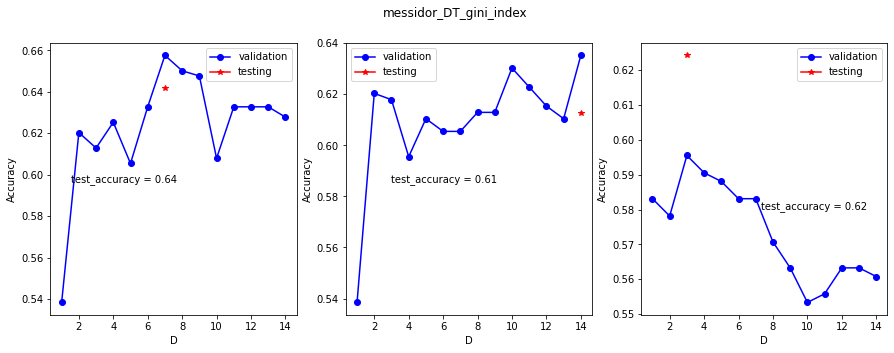

In [ ]:
model_choices_List =[]
valid_acc_List =[]
bestDs =[]
test_accuracy_List =[]

for i in range(3):   # validate each hepatitis datasets 
    X_train, X_test, y_train, y_test = \
    train_test_split(input_messidor[i], output_messidor[i], test_size=0.3, random_state=11)
    X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.5, random_state=11)

    model_choices=[]
    valid_acc = []
    n_valid = y_valid.shape[0]

    
    N = 15 
    for d in range(1,N): # find the best D 
      tree = DecisionTree(max_depth=d,cost_fn=cost_gini_index)
      y_valid_pred = tree.fit(X_train, y_train).predict(X_valid)
      accuracy = tree.evaluate_acc(y_valid,y_valid_pred)
      model_choices.append(d)
      valid_acc.append(accuracy)


    best_valid_D = model_choices[valid_acc.index(max(valid_acc))]
    model_choices_List.append(model_choices)
    bestDs.append(best_valid_D)
    valid_acc_List.append(valid_acc)

    tree = DecisionTree(max_depth=best_valid_D,cost_fn=cost_gini_index)
    y_test_pred = tree.fit(X_train, y_train).predict(X_test)
    test_accuracy = tree.evaluate_acc(y_test,y_test_pred)
    test_accuracy_List.append(test_accuracy)


#plot validation and testing accuracy using gini index cost function
fig, axes = plt.subplots(1, 3)
fig.suptitle('messidor_DT_gini_index')
fig.set_figwidth(15), fig.set_figheight(5)
axes[0].plot(model_choices_List[0], valid_acc_List[0], marker='o', color='blue', label='validation')
axes[0].plot(bestDs[0], test_accuracy_List[0], marker='*', color='red', label='testing')
axes[0].set_xlabel('D'), axes[0].set_ylabel('Accuracy'), axes[0].legend(loc='best')
axes[1].plot(model_choices_List[1], valid_acc_List[1], marker='o', color='blue', label='validation')
axes[1].plot(bestDs[1], test_accuracy_List[1], marker='*', color='red', label='testing')
axes[1].set_xlabel('D'), axes[1].set_ylabel('Accuracy'), axes[1].legend(loc='best')
axes[2].plot(model_choices_List[2], valid_acc_List[2], marker='o', color='blue', label='validation')
axes[2].plot(bestDs[2], test_accuracy_List[2], marker='*', color='red', label='testing')
axes[2].set_xlabel('D'), axes[2].set_ylabel('Accuracy'), axes[2].legend(loc='best')



axes[0].text(0.3, 0.5, "test_accuracy = %0.2f"% test_accuracy_List[0], horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)
axes[1].text(0.4, 0.5, "test_accuracy = %0.2f"% test_accuracy_List[1], horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
axes[2].text(0.7, 0.4, "test_accuracy = %0.2f"% test_accuracy_List[2], horizontalalignment='center', verticalalignment='center', transform=axes[2].transAxes)

we may need to preprocess the messidor_features_data again or use DT to increase accuracy scores for messidor_features_data 

Text(0.6, 0.5, 'test_accuracy = 0.76')

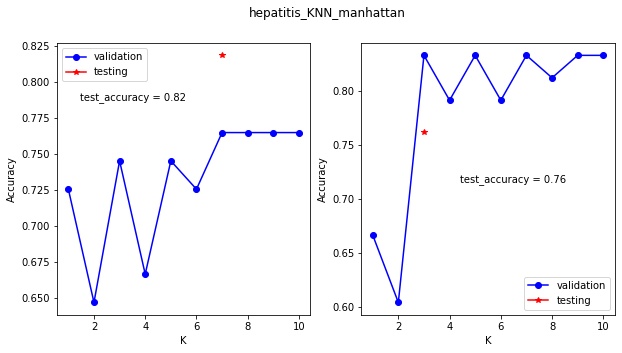

In [ ]:
model_choices_List =[]
valid_acc_List =[]
bestKs =[]
test_accuracy_List =[]

for i in range(len(input_hepatitis)):   # validate each hepatitis datasets 
    X_train, X_test, y_train, y_test = \
    train_test_split(input_hepatitis[i], output_hepatitis[i], test_size=0.3, random_state=11)
    X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.5, random_state=11)

    model_choices=[]
    valid_acc = []
    n_valid = y_valid.shape[0]

    for k in range(1,11): #find the best K
        knn = KNN(K=k) # create a KNN object (OOP)
        knn.fit(X_train, y_train)
        y_valid_pred = knn.predict(X_valid)
        accuracy = knn.evaluate_acc(y_valid,y_valid_pred)
        model_choices.append(k)
        valid_acc.append(accuracy)

    best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
    model_choices_List.append(model_choices)
    bestKs.append(best_valid_K)
    valid_acc_List.append(valid_acc)
    knn = KNN(K=best_valid_K)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_accuracy = knn.evaluate_acc(y_test,y_test_pred)
    test_accuracy_List.append(test_accuracy)

#plot validation and testing accuracy using manhanttan distance function
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('hepatitis_KNN_manhattan')
fig.set_figwidth(10), fig.set_figheight(5)
ax1.plot(model_choices_List[0], valid_acc_List[0], marker='o', color='blue', label='validation')
ax1.plot(bestKs[0], test_accuracy_List[0], marker='*', color='red', label='testing')
ax1.set_xlabel('K'), ax1.set_ylabel('Accuracy'), ax1.legend(loc='best')
ax2.plot(model_choices_List[1], valid_acc_List[1], marker='o', color='blue', label='validation')
ax2.plot(bestKs[1], test_accuracy_List[1], marker='*', color='red', label='testing')
ax2.set_xlabel('K'), ax2.set_ylabel('Accuracy'), ax2.legend(loc='best')

ax1.text(0.3, 0.8, "test_accuracy = %0.2f"% test_accuracy_List[0], horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.6, 0.5, "test_accuracy = %0.2f"% test_accuracy_List[1], horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

Text(0.6, 0.5, 'test_accuracy = 0.71')

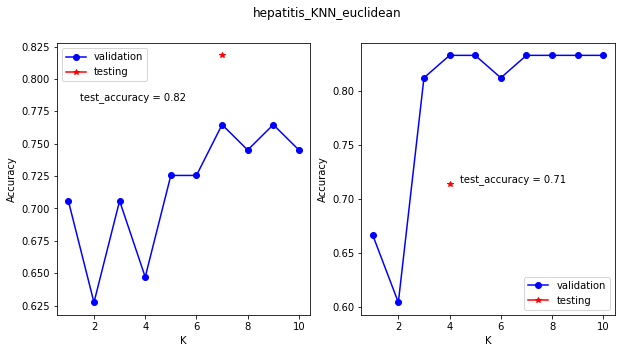

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))

model_choices_List =[]
valid_acc_List =[]
bestKs =[]
test_accuracy_List =[]
for i in range(len(input_hepatitis)): # validate each hepatitis datasets 
    X_train, X_test, y_train, y_test = \
    train_test_split(input_hepatitis[i], output_hepatitis[i], test_size=0.3, random_state=11)
    X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.5, random_state=11)

    model_choices=[]
    valid_acc = []
    n_valid = y_valid.shape[0]
    N=int(n_valid**0.5)

    for k in range(1,11): #find the best K
        knn = KNN(K=k,dist_fn=euclidean) # create a KNN object (OOP)
        knn.fit(X_train, y_train)
        y_valid_pred = knn.predict(X_valid)
        accuracy = knn.evaluate_acc(y_valid,y_valid_pred)
        model_choices.append(k)
        valid_acc.append(accuracy)

    best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
    model_choices_List.append(model_choices)
    bestKs.append(best_valid_K)
    valid_acc_List.append(valid_acc)
    knn = KNN(K=best_valid_K,dist_fn=euclidean)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_accuracy = knn.evaluate_acc(y_test,y_test_pred)
    test_accuracy_List.append(test_accuracy)

#plot validation and testing accuracy using euclidean distance function
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('hepatitis_KNN_euclidean')
fig.set_figwidth(10), fig.set_figheight(5)
ax1.plot(model_choices_List[0], valid_acc_List[0], marker='o', color='blue', label='validation')
ax1.plot(bestKs[0], test_accuracy_List[0], marker='*', color='red', label='testing')
ax1.set_xlabel('K'), ax1.set_ylabel('Accuracy'), ax1.legend(loc='best')
ax2.plot(model_choices_List[1], valid_acc_List[1], marker='o', color='blue', label='validation')
ax2.plot(bestKs[1], test_accuracy_List[1], marker='*', color='red', label='testing')
ax2.set_xlabel('K'), ax2.set_ylabel('Accuracy'), ax2.legend(loc='best')

ax1.text(0.3, 0.8, "test_accuracy = %0.2f"% test_accuracy_List[0], horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(0.6, 0.5, "test_accuracy = %0.2f"% test_accuracy_List[1], horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

Text(0.7, 0.5, 'test_accuracy = 0.57')

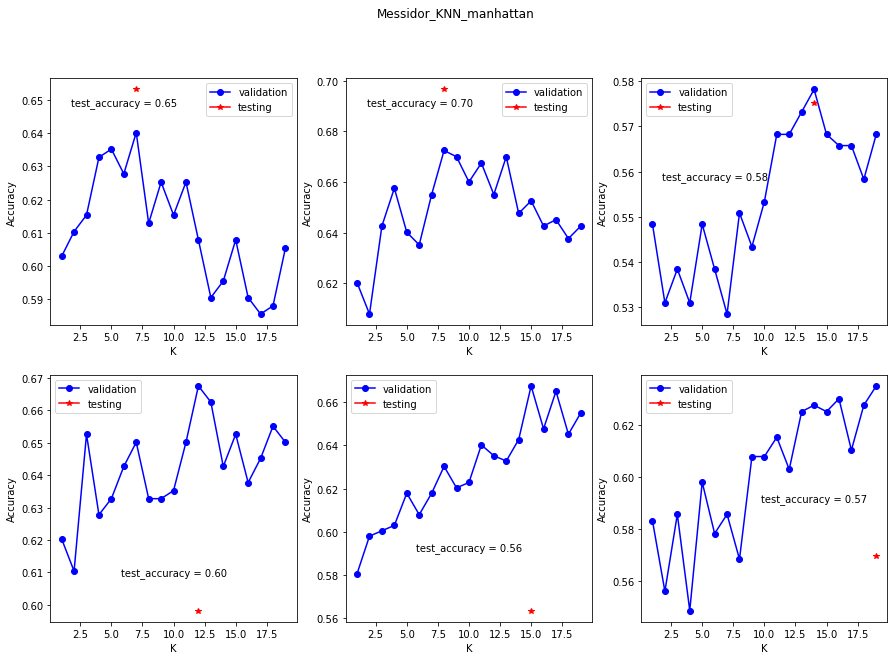

In [ ]:
model_choices_List =[]
valid_acc_List =[]
bestKs =[]
test_accuracy_List =[]
for i in range(len(input_messidor)): # validate each messidor datasets 
    X_train, X_test, y_train, y_test = \
    train_test_split(input_messidor[i], output_messidor[i], test_size=0.3, random_state=11)
    X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.5, random_state=11)

    model_choices=[]
    valid_acc = []
    n_valid = y_valid.shape[0]
    N=int(n_valid**0.5)

    for k in range(1,N): #find the best K
        knn = KNN(K=k) # create a KNN object (OOP)
        knn.fit(X_train, y_train)
        y_valid_pred = knn.predict(X_valid)
        accuracy = knn.evaluate_acc(y_valid,y_valid_pred)
        model_choices.append(k)
        valid_acc.append(accuracy)

    best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
    model_choices_List.append(model_choices)
    bestKs.append(best_valid_K)
    valid_acc_List.append(valid_acc)
    knn = KNN(K=best_valid_K)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_accuracy = knn.evaluate_acc(y_test,y_test_pred)
    test_accuracy_List.append(test_accuracy)

#plot validation and testing accuracy using manhattan distance function

fig, axes = plt.subplots(2,3)
fig.suptitle('Messidor_KNN_manhattan')
fig.set_figwidth(15), fig.set_figheight(10)
axes[0,0].plot(model_choices_List[0], valid_acc_List[0], marker='o', color='blue', label='validation')
axes[0,0].plot(bestKs[0], test_accuracy_List[0], marker='*', color='red', label='testing')
axes[0,0].set_xlabel('K'), axes[0,0].set_ylabel('Accuracy'), axes[0,0].legend(loc='best')
axes[0,1].plot(model_choices_List[1], valid_acc_List[1], marker='o', color='blue', label='validation')
axes[0,1].plot(bestKs[1], test_accuracy_List[1], marker='*', color='red', label='testing')
axes[0,1].set_xlabel('K'), axes[0,1].set_ylabel('Accuracy'), axes[0,1].legend(loc='best')
axes[0,2].plot(model_choices_List[2], valid_acc_List[2], marker='o', color='blue', label='validation')
axes[0,2].plot(bestKs[2], test_accuracy_List[2], marker='*', color='red', label='testing')
axes[0,2].set_xlabel('K'), axes[0,2].set_ylabel('Accuracy'), axes[0,2].legend(loc='best')
axes[1,0].plot(model_choices_List[3], valid_acc_List[3], marker='o', color='blue', label='validation')
axes[1,0].plot(bestKs[3], test_accuracy_List[3], marker='*', color='red', label='testing')
axes[1,0].set_xlabel('K'), axes[1,0].set_ylabel('Accuracy'), axes[1,0].legend(loc='best')
axes[1,1].plot(model_choices_List[4], valid_acc_List[4], marker='o', color='blue', label='validation')
axes[1,1].plot(bestKs[4], test_accuracy_List[4], marker='*', color='red', label='testing')
axes[1,1].set_xlabel('K'), axes[1,1].set_ylabel('Accuracy'), axes[1,1].legend(loc='best')
axes[1,2].plot(model_choices_List[5], valid_acc_List[5], marker='o', color='blue', label='validation')
axes[1,2].plot(bestKs[5], test_accuracy_List[5], marker='*', color='red', label='testing')
axes[1,2].set_xlabel('K'), axes[1,2].set_ylabel('Accuracy'), axes[1,2].legend(loc='best')

axes[0,0].text(0.3, 0.9, "test_accuracy = %0.2f"% test_accuracy_List[0], horizontalalignment='center', verticalalignment='center', transform=axes[0,0].transAxes)
axes[0,1].text(0.3, 0.9, "test_accuracy = %0.2f"% test_accuracy_List[1], horizontalalignment='center', verticalalignment='center', transform=axes[0,1].transAxes)
axes[0,2].text(0.3, 0.6, "test_accuracy = %0.2f"% test_accuracy_List[2], horizontalalignment='center', verticalalignment='center', transform=axes[0,2].transAxes)
axes[1,0].text(0.5, 0.2, "test_accuracy = %0.2f"% test_accuracy_List[3], horizontalalignment='center', verticalalignment='center', transform=axes[1,0].transAxes)
axes[1,1].text(0.5, 0.3, "test_accuracy = %0.2f"% test_accuracy_List[4], horizontalalignment='center', verticalalignment='center', transform=axes[1,1].transAxes)
axes[1,2].text(0.7, 0.5, "test_accuracy = %0.2f"% test_accuracy_List[5], horizontalalignment='center', verticalalignment='center', transform=axes[1,2].transAxes)


Text(0.7, 0.5, 'test_accuracy = 0.53')

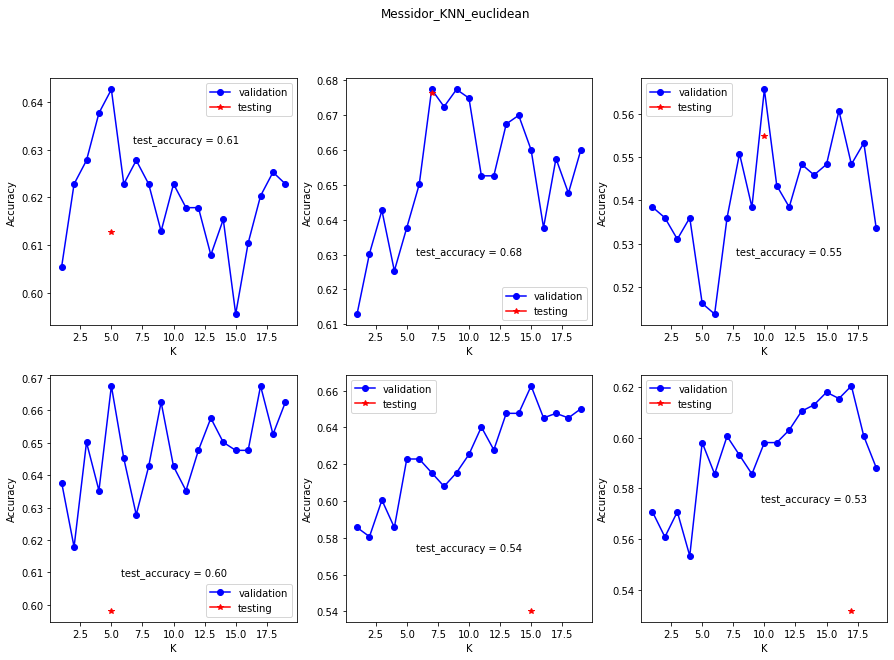

In [ ]:
model_choices_List =[]
valid_acc_List =[]
bestKs =[]
test_accuracy_List =[]
for i in range(len(input_messidor)):
    X_train, X_test, y_train, y_test = \
    train_test_split(input_messidor[i], output_messidor[i], test_size=0.3, random_state=11)
    X_train, X_valid, y_train, y_valid = \
    train_test_split(X_train, y_train, test_size=0.5, random_state=11)

    model_choices=[]
    valid_acc = []
    n_valid = y_valid.shape[0]
    N=int(n_valid**0.5)

    for k in range(1,N):
        knn = KNN(K=k, dist_fn=euclidean) # create a KNN object (OOP)
        knn.fit(X_train, y_train)
        y_valid_pred = knn.predict(X_valid)
        accuracy = knn.evaluate_acc(y_valid,y_valid_pred)
        model_choices.append(k)
        valid_acc.append(accuracy)

    best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
    model_choices_List.append(model_choices)
    bestKs.append(best_valid_K)
    valid_acc_List.append(valid_acc)
    knn = KNN(K=best_valid_K, dist_fn=euclidean)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_accuracy = knn.evaluate_acc(y_test,y_test_pred)
    test_accuracy_List.append(test_accuracy)
    
#plot validation and testing accuracy using euclidean distance function

fig, axes = plt.subplots(2,3)
fig.suptitle('Messidor_KNN_euclidean')
fig.set_figwidth(15), fig.set_figheight(10)
axes[0,0].plot(model_choices_List[0], valid_acc_List[0], marker='o', color='blue', label='validation')
axes[0,0].plot(bestKs[0], test_accuracy_List[0], marker='*', color='red', label='testing')
axes[0,0].set_xlabel('K'), axes[0,0].set_ylabel('Accuracy'), axes[0,0].legend(loc='best')
axes[0,1].plot(model_choices_List[1], valid_acc_List[1], marker='o', color='blue', label='validation')
axes[0,1].plot(bestKs[1], test_accuracy_List[1], marker='*', color='red', label='testing')
axes[0,1].set_xlabel('K'), axes[0,1].set_ylabel('Accuracy'), axes[0,1].legend(loc='best')
axes[0,2].plot(model_choices_List[2], valid_acc_List[2], marker='o', color='blue', label='validation')
axes[0,2].plot(bestKs[2], test_accuracy_List[2], marker='*', color='red', label='testing')
axes[0,2].set_xlabel('K'), axes[0,2].set_ylabel('Accuracy'), axes[0,2].legend(loc='best')
axes[1,0].plot(model_choices_List[3], valid_acc_List[3], marker='o', color='blue', label='validation')
axes[1,0].plot(bestKs[3], test_accuracy_List[3], marker='*', color='red', label='testing')
axes[1,0].set_xlabel('K'), axes[1,0].set_ylabel('Accuracy'), axes[1,0].legend(loc='best')
axes[1,1].plot(model_choices_List[4], valid_acc_List[4], marker='o', color='blue', label='validation')
axes[1,1].plot(bestKs[4], test_accuracy_List[4], marker='*', color='red', label='testing')
axes[1,1].set_xlabel('K'), axes[1,1].set_ylabel('Accuracy'), axes[1,1].legend(loc='best')
axes[1,2].plot(model_choices_List[5], valid_acc_List[5], marker='o', color='blue', label='validation')
axes[1,2].plot(bestKs[5], test_accuracy_List[5], marker='*', color='red', label='testing')
axes[1,2].set_xlabel('K'), axes[1,2].set_ylabel('Accuracy'), axes[1,2].legend(loc='best')

axes[0,0].text(0.55, 0.75, "test_accuracy = %0.2f"% test_accuracy_List[0], horizontalalignment='center', verticalalignment='center', transform=axes[0,0].transAxes)
axes[0,1].text(0.5, 0.3, "test_accuracy = %0.2f"% test_accuracy_List[1], horizontalalignment='center', verticalalignment='center', transform=axes[0,1].transAxes)
axes[0,2].text(0.6, 0.3, "test_accuracy = %0.2f"% test_accuracy_List[2], horizontalalignment='center', verticalalignment='center', transform=axes[0,2].transAxes)
axes[1,0].text(0.5, 0.2, "test_accuracy = %0.2f"% test_accuracy_List[3], horizontalalignment='center', verticalalignment='center', transform=axes[1,0].transAxes)
axes[1,1].text(0.5, 0.3, "test_accuracy = %0.2f"% test_accuracy_List[4], horizontalalignment='center', verticalalignment='center', transform=axes[1,1].transAxes)
axes[1,2].text(0.7, 0.5, "test_accuracy = %0.2f"% test_accuracy_List[5], horizontalalignment='center', verticalalignment='center', transform=axes[1,2].transAxes)


ROC: KNN Hepatitis

Text(0, 0.5, 'True Positive Rate')

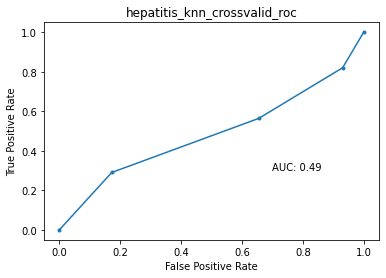

In [ ]:

knn=KNN(K=7, dist_fn=manhattan)

true_labels,pred_scores = cross_validate(knn, input_hepatitis[0], output_hepatitis[0])
fpr, tpr, _ = roc_curve(true_labels, pred_scores)
auc = roc_auc_score(true_labels, pred_scores)
fig = plt.figure()
ax = fig.add_subplot(111)

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray') #AttributeError: module 'matplotlib.pyplot' has no attribute 'axline'
plt.text(0.7, 0.3, 'AUC: '+str(round(auc,2)))
plt.title('hepatitis_knn_crossvalid_roc')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")



ROC: KNN vs DT Messidor

In [ ]:
aucs=[]
for j in range(1,N): #find the best K for cross validation
    knn = KNN(K=j)
    true_labels,pred_scores = cross_validate(knn, input_messidor[0], output_messidor[0])
    auc = roc_auc_score(true_labels, pred_scores)
    aucs.append(auc)

bestK = int(aucs.index(max(aucs))+1)
knn=KNN(K=bestK)

true_labels,pred_scores = cross_validate(knn, input_messidor[0], output_messidor[0])
fpr_KNN_messidor, tpr_KNN_messidor, _ = roc_curve(true_labels, pred_scores)
auc_KNN_messidor = roc_auc_score(true_labels, pred_scores)


In [ ]:
m_best_accs=[]
m_bestKs=[]

for i in range(len(input_messidor)):
    N=int(output_messidor[i].shape[0]**0.5)
    aucs=[]
    for j in range(1,N): #find the best K for cross validation
        knn = KNN(K=j)
        true_labels,pred_scores = cross_validate(knn, input_messidor[i], output_messidor[i])
        auc = roc_auc_score(true_labels, pred_scores)
        aucs.append(auc)
    bestK = int(aucs.index(max(aucs))+1)
    m_bestKs.append(bestK)
    m_best_accs.append(max(aucs))

index=int(m_best_accs.index(max(m_best_accs)))
knn=KNN(K=m_bestKs[index])
true_labels,pred_scores = cross_validate(knn, input_messidor[index], output_messidor[index])
fpr_1, tpr_1, _ = roc_curve(true_labels, pred_scores)
auc_1 = roc_auc_score(true_labels, pred_scores)

In [ ]:
aucs=[]
for d in range(1,N): # find the best D 
  tree = DecisionTree(max_depth=d,cost_fn=cost_entropy) # change the cost function
  true_labels,pred_scores = cross_validate(knn, input_messidor[1], output_messidor[1]) #change input and output
  auc = roc_auc_score(true_labels, pred_scores)
  aucs.append(auc)

best_valid_D = int(aucs.index(max(aucs))+1)

tree = DecisionTree(max_depth=best_valid_D,cost_fn=cost_gini_index) # change

true_labels,pred_scores = cross_validate(tree, input_messidor[1], output_messidor[1])
fpr_2, tpr_2, _ = roc_curve(true_labels, pred_scores)
auc_2 = roc_auc_score(true_labels, pred_scores)


Text(0, 0.5, 'True Positive Rate')

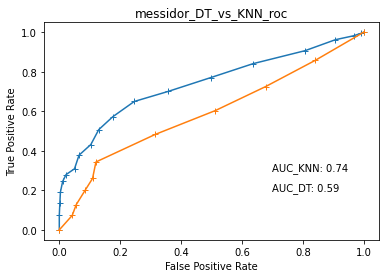

In [ ]:
# plot the roc curve for each model
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(fpr_1, tpr_1, marker='+')
plt.plot(fpr_2, tpr_2, marker='+')

# plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray') #AttributeError: module 'matplotlib.pyplot' has no attribute 'axline'
plt.text(0.7, 0.3, 'AUC_KNN: '+str(round(auc_1,2)))
plt.text(0.7, 0.2, 'AUC_DT: '+str(round(auc_2,2)))
plt.title('messidor_DT_vs_KNN_roc')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

Decision Boundary

In [ ]:
input_hepatitis= dropped_hepatitis_data1[['AGE','SGOT']]
output_hepatitis = hepatitis_data['DieLive']
input_hepatitis.head()

,AGE,SGOT
0,30.0,18.0
1,50.0,42.0
2,78.0,32.0
4,34.0,200.0
5,34.0,28.0


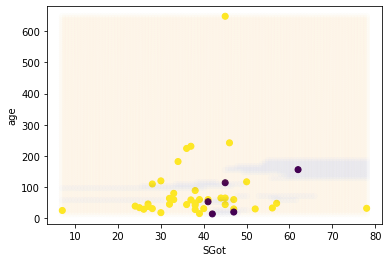

In [ ]:
input_hepatitis= dropped_hepatitis_data1[['AGE','SGOT']].to_numpy()
# output_hepatitis = hepatitis_data['DieLive'].to_numpy()  #wrong code
output_hepatitis = dropped_hepatitis_data1['DieLive'].to_numpy()  #fixed

X_train, X_test, y_train, y_test = train_test_split(input_hepatitis, output_hepatitis, test_size=0.3, random_state=11)
knn = KNN(K=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)


#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(X_test[:,0]), np.max(X_test[:,0]), 100)
x1v = np.linspace(np.min(X_test[:,1]), np.max(X_test[:,1]), 100) #sgot feature 

x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

y_pred1 = knn.predict(x_all)


plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_pred1, marker='o', alpha=0.01)
plt.ylabel('age')
plt.xlabel('SGot')
plt.show()